1. Imports & Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Loading


In [3]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

3. Overview del Dataset


In [4]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


La colonna Total Charges risulta essere memorizzata come stringa, sebbene essa contenga dei float come per la colonna monthly charges

In [6]:
print("First 10 users")
print(df.head(10))
print("Last 10 users")
print(df.tail(10))

First 10 users
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service         

4. Analisi Target Variable (Churn)


In [7]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


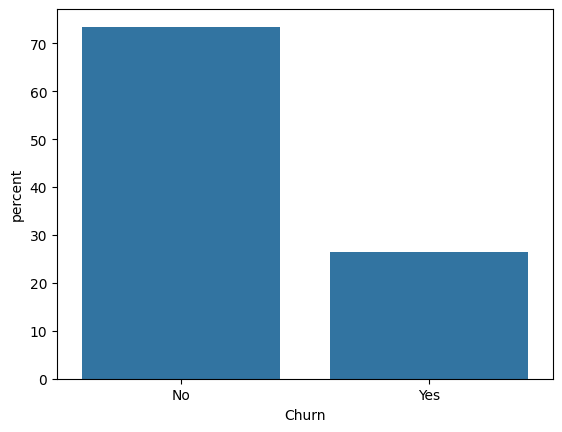

In [8]:
churn_counts = df["Churn"].value_counts(normalize =True)
print(churn_counts)
sns.countplot(df, x = "Churn", stat = "percent")
plt.show()

La rappresentazione grafica mostra come i no siano al 73%, rispetto al 27% dei si, pertanto rappresentando un forte sbilanciamento

5. Missing Values Analysis


In [9]:
print("Missing value check:\n")
print(df.isnull().sum())
print("\nChecking for hidden missing values\n")
print((df == " ").sum())

Missing value check:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking for hidden missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn 

In [16]:
print("Removing hidden missing values with replace()")
df["TotalCharges"] = df["TotalCharges"].replace(r'^\s*$', value = 0, regex = True)


Removing hidden missing values with replace()


In [23]:
print(df[(df["tenure"] > 0) & (df["TotalCharges"] == 0)])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


tutti i missing values presenti nel dataframe sono dovuti al fatto che i valori che prima erano vuoti erano legati a quegli utenti con una tenure bassa, quindi appena iscritti, pertanto la nostra sostituzione non ha impattato la coerenza di tali dati

In [11]:
print("Checking if they have been removed")
print((df == " ").sum())

Checking if they have been removed
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
print("Finally we can modify totalcharges type")
# Re-assigning to the same column name makes the change permanent
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Finally we can modify totalcharges type


In [13]:
print("Checking the new datatype")
print(df["TotalCharges"].dtype)

Checking the new datatype
float64


<Axes: >

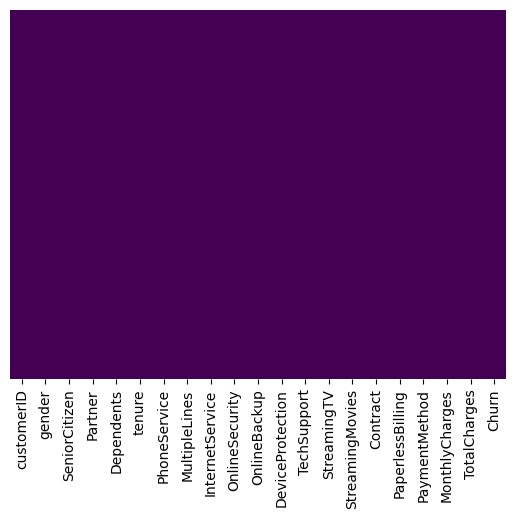

In [31]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

6. Analisi Statistica Descrittiva


In [14]:
print("Analyzing numerical features")
print(df.describe())

Analyzing numerical features
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


dall'analisi sui dati numerici ci rendiamo conto che potremmo avere degli outlier soltanto nel caso di totalcharges, anche se esso può essere dovuto da una combinazione del tutto ragionevole di tenure e monthly charges, avremo una visione migliore dopo con il boxplot

In [15]:
print("Analyzing categorical features")
print(df.nunique())
print("\nNumber of duplicated lines")
print(df.duplicated().sum())

Analyzing categorical features
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Number of duplicated lines
0


7. Analisi Categorica Dettagliata

In [37]:
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
print(df["Contract"].value_counts())
print(df["InternetService"].value_counts())
print(df["PaymentMethod"].value_counts())
print(df["gender"].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64


dall'analisi delle variabili categoriche più rilevanti, non sembra esserci un totale squilibrio tra le distribuzioni delle features

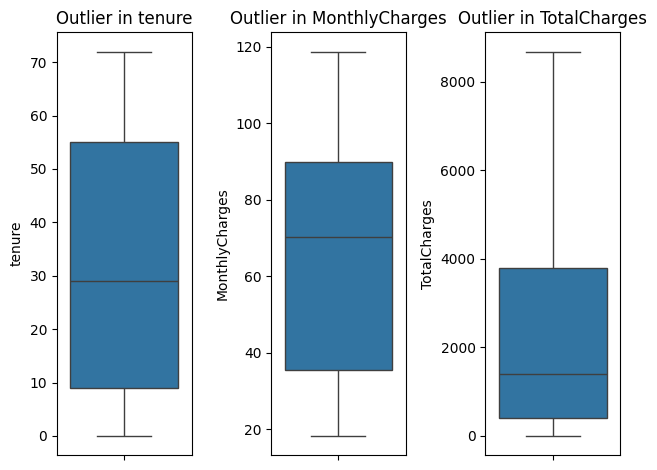

In [43]:
features_numeriche = ["tenure", "MonthlyCharges", "TotalCharges"]

for i, col in enumerate(features_numeriche):
    plt.subplot(1,3,i+1)
    sns.boxplot( y = df[col])
    plt.title(f"Outlier in {col}") 

plt.tight_layout()
plt.show()